<a href="https://colab.research.google.com/github/furlancad/Estudo-PMF/blob/main/Rastreador_de_Carteira_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [2]:
def baixar_dados(tickers, inicio, fim):
    dados = yf.download(tickers, start=inicio, end=fim, progress=False)['Adj Close']
    return dados

def rastrear_carteira(tickers, pesos, inicio, fim):
    dados = baixar_dados(tickers, inicio, fim)
    retorno = dados.pct_change()
    retorno_ponderado = (retorno * pesos).sum(axis=1)
    carteira_acumulada = (1 + retorno_ponderado).cumprod()

    return carteira_acumulada

def baixar_benchmark(ticker, inicio, fim):
    benchmark = yf.download(ticker, start=inicio, end=fim, progress=False)['Adj Close']
    benchmark = benchmark/benchmark.iloc[0]
    return benchmark

def comparar_com_benchmark(carteira_acumulada, benchmark,
                           nome_carteira='Carteira', nome_benchmark='Benchmark'):
    df = pd.DataFrame({nome_carteira: carteira_acumulada, nome_benchmark: benchmark})
    df.plot(figsize=(10, 6))
    plt.title('Comparação com Benchmark')
    plt.xlabel('Data')
    plt.ylabel('Retorno Acumulado')
    plt.show()

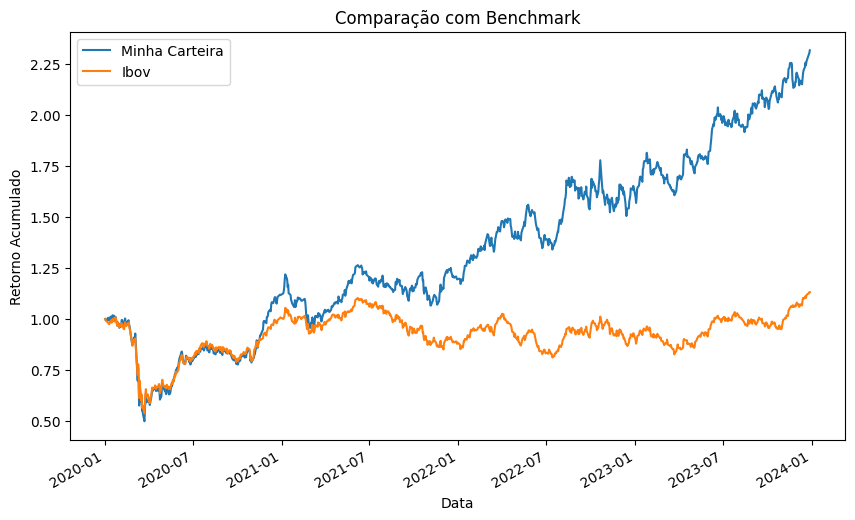

In [3]:
# Defina os tickers e pesos da sua carteira
tickers = ['PETR4.SA', 'VALE3.SA', 'BBAS3.SA', 'CMIG4.SA']
pesos = [0.25, 0.25, 0.25, 0.25]

# Defina o período desejado para análise
inicio = datetime(2020, 1, 1)
fim = datetime(2024, 1, 1)

# Rastreie a carteira
carteira_acumulada = rastrear_carteira(tickers, pesos, inicio, fim)

# Baixe o benchmark (S&P 500)
Ibov = baixar_benchmark('^BVSP', inicio, fim)

# Compare com o benchmark e plote o desempenho
comparar_com_benchmark(carteira_acumulada, Ibov,
                       nome_carteira='Minha Carteira', nome_benchmark='Ibov')